This notebook require [CReM](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-00431-w), which can be downloaded from https://github.com/DrrDom/crem  
You also need to download a "replacements" database from https://www.qsar4u.com/pages/crem.php   
For this example I used **replacements02_sc2.5.db**

In [12]:
from crem.crem import grow_mol, mutate_mol
from rdkit import Chem
import pandas as pd
from tqdm.auto import tqdm

A link to the CReM database. 

In [2]:
crem_db_file = '/Users/pwalters/modsource/python/rdkit/crem/replacements02_sc2.5.db'

Read a fragment SMILES

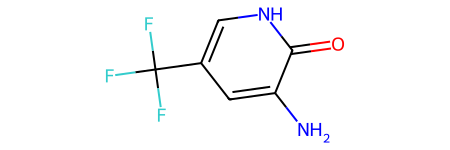

In [5]:
frag_smi = "Nc1cc(c[nH]c1=O)C(F)(F)F"
frag_mol = Chem.MolFromSmiles(frag_smi)
frag_mol

Generate analogs using the CReM "grow" method.

In [15]:
out_list = []
grow_list = list(grow_mol(frag_mol, db_name=crem_db_file,return_mol=False))
for idx,analog in enumerate(grow_list):
    out_list.append([idx,analog,frag_smi])
out_df = pd.DataFrame(out_list,columns=["Idx","SMILES","Input_SMILES"])
out_df.to_csv("crem_grow_samples.csv",index=False)

[10:55:51] WARNING: not removing hydrogen atom with dummy atom neighbors
[10:55:51] WARNING: not removing hydrogen atom with dummy atom neighbors
[10:55:51] WARNING: not removing hydrogen atom with dummy atom neighbors
[10:55:51] WARNING: not removing hydrogen atom with dummy atom neighbors


Generate analogs with the CReM "mutate" method. 

In [16]:
out_list = []
grow_list = list(mutate_mol(frag_mol, db_name=crem_db_file,return_mol=False))
for idx,analog in enumerate(grow_list):
    out_list.append([idx,analog,frag_smi])
out_df = pd.DataFrame(out_list,columns=["Idx","SMILES","Input_SMILES"])
out_df.to_csv("crem_mutate_samples.csv",index=False)